# Lab Instructions

Find a dataset that interests you. I'd recommend starting on [Kaggle](https://www.kaggle.com/). Read through all of the material about the dataset and download a .CSV file.

1. Write a short summary of the data.  Where did it come from?  How was it collected?  What are the features in the data?  Why is this dataset interesting to you?  

2. Identify 5 interesting questions about your data that you can answer using Pandas methods.  

3. Answer those questions!  You may use any method you want (including LLMs) to help you write your code; however, you should use Pandas to find the answers.  LLMs will not always write code in this way without specific instruction.  

4. Write the answer to your question in a text box underneath the code you used to calculate the answer.



# Summary
I've chosen a steam data set. Which shows a list of user behaviors, with columns: user-id, game-title, behavior-name, value. The behaviors included are 'purchase' and 'play'. The value indicates the degree to which the behavior was performed - in the case of 'purchase' the value is always 1, and in the case of 'play' the value represents the number of hours the user has played the game. The data comes entirely collected from Steam's public data.

This dataset comes from: [SteamData](https://www.kaggle.com/datasets/tamber/steam-video-games?select=steam-200k.csv)

# Why it Intrests me
As someone whose main hobby is gaming and a frequent Steam user, I’m interested in this dataset because it shows which games people buy and actually play—along with their playtime—helping me focus on titles with high engagement and strong potential for attracting viewers when I return to streaming on Twitch.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
steam_df = pd.read_csv('steam_200k.csv')
steam_df.head()

,User_Id,Game,Action,Value,Other
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
1,151603712,The Elder Scrolls V Skyrim,play,273.0,0
2,151603712,Fallout 4,purchase,1.0,0
3,151603712,Fallout 4,play,87.0,0
4,151603712,Spore,purchase,1.0,0


# Questions
1. Which games have the highest average playtime?

In [3]:
play_df = steam_df[steam_df['Action'] == 'play']
avg_playtime = play_df.groupby('Game')['Value'].mean().sort_values(ascending=False)
avg_playtime.head(10)

Game
Eastside Hockey Manager              1295.000000
Baldur's Gate II Enhanced Edition     475.255556
FIFA Manager 09                       411.000000
Perpetuum                             400.975000
Football Manager 2014                 391.984615
Football Manager 2012                 390.453165
Football Manager 2010                 375.048571
Football Manager 2011                 365.703226
Freaking Meatbags                     331.000000
Out of the Park Baseball 16           330.400000
Name: Value, dtype: float64

# Answer

- The games with the highest average play time is EastSide Hockey Manager, Baldur's Gate II Enhanced edition, FIFA Manager 09

2. What are the top 10 most purchased games?

In [4]:
purchase_df = steam_df[steam_df['Action'] == 'purchase']
purchase_df['Game'].value_counts().head(10)

Game
Dota 2                             4841
Team Fortress 2                    2323
Unturned                           1563
Counter-Strike Global Offensive    1412
Half-Life 2 Lost Coast              981
Counter-Strike Source               978
Left 4 Dead 2                       951
Counter-Strike                      856
Warframe                            847
Half-Life 2 Deathmatch              823
Name: count, dtype: int64

# Answer

- The top ten purchased names are :

Dota 2                             
Team Fortress 2                    
Unturned                           
Counter-Strike Global Offensive    
Half-Life 2 Lost Coast              
Counter-Strike Source               
Left 4 Dead 2                       
Counter-Strike                      
Warframe                            
Half-Life 2 Deathmatch              

3. Do players tend to play their most purchased games the most, or is there a gap between purchases and actual playtime?

In [9]:
purchase_count = purchase_df['Game'].value_counts()

hour_count = play_df.groupby('Game')['Value'].sum()

comparison = {
    "purchases": purchase_count,
    "playTime": hour_count
}
pd.DataFrame(comparison).sort_values(by='purchases', ascending=False).head(10)

,purchases,playTime
Game,,
Dota 2,4841,981684.6
Team Fortress 2,2323,173673.3
Unturned,1563,16096.4
Counter-Strike Global Offensive,1412,322771.6
Half-Life 2 Lost Coast,981,184.4
Counter-Strike Source,978,96075.5
Left 4 Dead 2,951,33596.7
Counter-Strike,856,134261.1
Warframe,847,27074.6


# Answer

- While there is some overlap between the most purchased and most played games, the data indicates that purchase volume does not always correlate with total playtime. Some heavily purchased games show relatively low playtime, suggesting impulse buys or unplayed library additions.

4. Which games have the highest total playtime across all players?

In [18]:
total_playtime = play_df.groupby('Game')['Value'].sum().sort_values(ascending=False)
total_playtime.head(10)

Game
Dota 2                                         981684.6
Counter-Strike Global Offensive                322771.6
Team Fortress 2                                173673.3
Counter-Strike                                 134261.1
Sid Meier's Civilization V                      99821.3
Counter-Strike Source                           96075.5
The Elder Scrolls V Skyrim                      70889.3
Garry's Mod                                     49725.3
Call of Duty Modern Warfare 2 - Multiplayer     42009.9
Left 4 Dead 2                                   33596.7
Name: Value, dtype: float64

# Answer

- Games like Dota 2, Counter-Strike: Global Offensive, and Team Fortress 2 have the highest total playtime across all players, showing they maintain strong, long-term communities that invest significant hours collectively.

5. What is the distribution of playtime among all users for a specific game?

count     4841.000000
mean       202.785499
std        600.555866
min          0.100000
25%          1.200000
50%          5.500000
75%         69.000000
max      10442.000000
Name: Value, dtype: float64

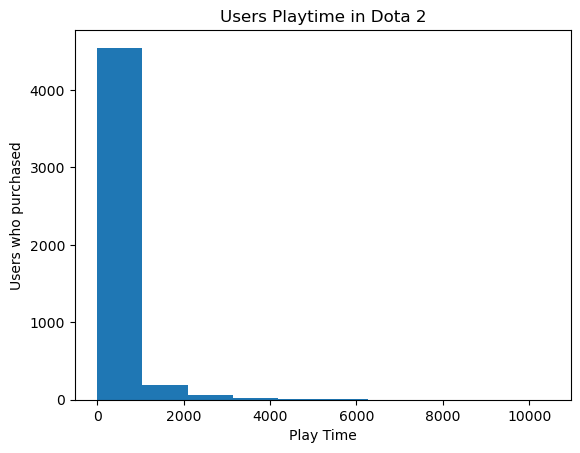

In [17]:
game_name = 'Dota 2'

dota_hours = play_df[play_df['Game'] == game_name]['Value']

dota_hours.plot(kind='hist')

plt.title('Users Playtime in Dota 2')
plt.ylabel('Users who purchased')
plt.xlabel('Play Time')

dota_hours.describe()

# Answer

- For Dota 2, the distribution of playtime is heavily skewed. While many players have only a few hours recorded, a smaller but dedicated group has logged hundreds or even thousands of hours. This suggests the game attracts both casual participants and a highly engaged competitive community.